# Machine Learning Techniques Lab_( 4276 - L41 + L42 )_CSE6024_LAB-FAT  : Implementation and Performance Analysis of the Efficiency of Classification of two Classification Algorithms :-  K-Nearest Neighbours (KNN) Classifier  and Support Vector Machine (SVM) Classifier on the Internet Advertisements DataSet 
                                                                                                                                         

Git Repo link :

# Submitted By: 20MAI0001 - NIHARIKA MAITRA

Link for Input dataset :

https://archive.ics.uci.edu/ml/datasets/internet+advertisements

https://archive.ics.uci.edu/ml/datasets/internet+advertisements



# A short  Description of the Internet Advertisements Dataset :

1)This Internet Advertisements Dataset  represents a set of possible advertisements on Internet pages. 

2)The Features in this Internet Advertisements Dataset includes encoding of the geometry of the image (if available) as well as phrases occuring in the URL, the image's URL and alt text, the anchor text, and words occuring near the anchor text. 

3)This dataset is used for the task  to Classify or predict whether an image is an advertisement ("ad") or not ("nonad").

In [211]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import collections

from sklearn.model_selection import  cross_val_score
#from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

%matplotlib inline
import os
#os.listdir()

1) Importing and Exploring the dataset : Internet Advertisements DataSet

In [212]:
df = pd.read_csv('ad.csv',low_memory=False, header = 0 )

In [213]:
#To Remove the unwanted columns from the dataset :
#df1=df.iloc[: , 1:]
df=df.drop('Unnamed: 0',axis=1)
df.columns=df.columns.astype('int')

In [214]:
#To view the 1st 5 rows of the input dataset :
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.



The First three colums of the dataframe are important and relevant for performing Classification  as most of the variation in results are 

impacted because of the first three Columns containing continuous varibles as values

    column1-> height of image
    column2->widht of image
    column30->aspect ratio



In [215]:
#Data type of first 3 columns that are relevant and important 
#from the dataframe of the dataset :
df.dtypes.head(3)

0    object
1    object
2    object
dtype: object

In [216]:
# Data set information
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB
None


Size/ Dimension of Input Dataset
    
   Rows: 3279 entries, 0 to 3278
   Columns: 1559 entries, 0 to 1558


In [217]:
# Information about the first 3 columns that are relevant 
#and important from the dataframe of the dataset :
df.iloc[:,0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3279 non-null   object
 1   1       3279 non-null   object
 2   2       3279 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB


In [218]:
#To check and give the count of missing values present for each of the 
#Input Features in the dataframe of the input dataset
df.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
1554    0
1555    0
1556    0
1557    0
1558    0
Length: 1559, dtype: int64

# 2) Data Pre-processing :

In [219]:
# Handling Missing Values - Data Imputation
# To replace ? with Not-an-Number (np.nan) and Filling the missing values 
# with Mean value of each attribute i.e, Filling the missing values with the 
#aggregated mean of non null values of each attribute with the help of fillna() Function:

def replace_missing(df):
    for i in df:
        df[i]=df[i].replace('[?]',np.NAN,regex=True).astype('float')
        df[i]=df[i].fillna(df[i].mean())
    return df

In [220]:
df[[0,1,2,3]]=replace_missing(df.iloc[:,[0,1,2,3]].copy()).values

In [221]:
#Rounding off the values to Get a nominal output using lambda Function
df[3]=df[3].apply(lambda x:round(x))

Exploring and Analysing the Pre-processed data :

In [222]:
#To view the detailed description of the input dataset :
df[[0,1,2,3]].describe()

,0,1,2,3
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,3.911953,0.768222
std,46.703695,110.729038,5.136153,0.422032
min,1.000000,1.000000,0.001500,0.000000
25%,32.500000,90.000000,1.279400,1.000000
50%,64.021886,150.000000,3.911953,1.000000
75%,64.021886,155.344828,3.911953,1.000000
max,640.000000,640.000000,60.000000,1.000000


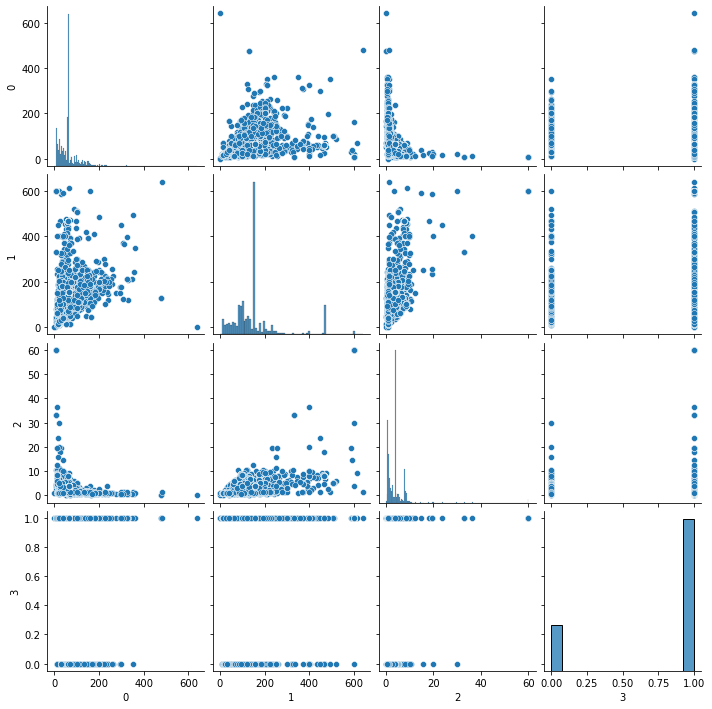

In [223]:
#Grid matrix Representation of the Features of the datset using pairplot:
sns.pairplot(data=df.iloc[:,[0,1,2,3,1558]])

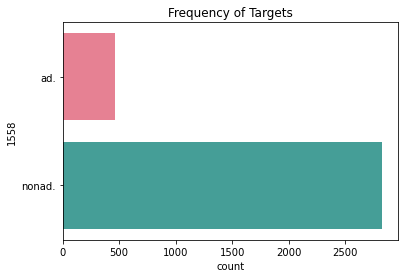

In [224]:
# To plot the Frequency of Target Class
sns.countplot(data=df,y=1558,palette='husl')
plt.title("Frequency of Targets")
plt.show()

Observation from above Plot of the Frequency of Target Class :
 
 'ad' - is very low in frequecny
 
 'non-ad' is very high in frequecy


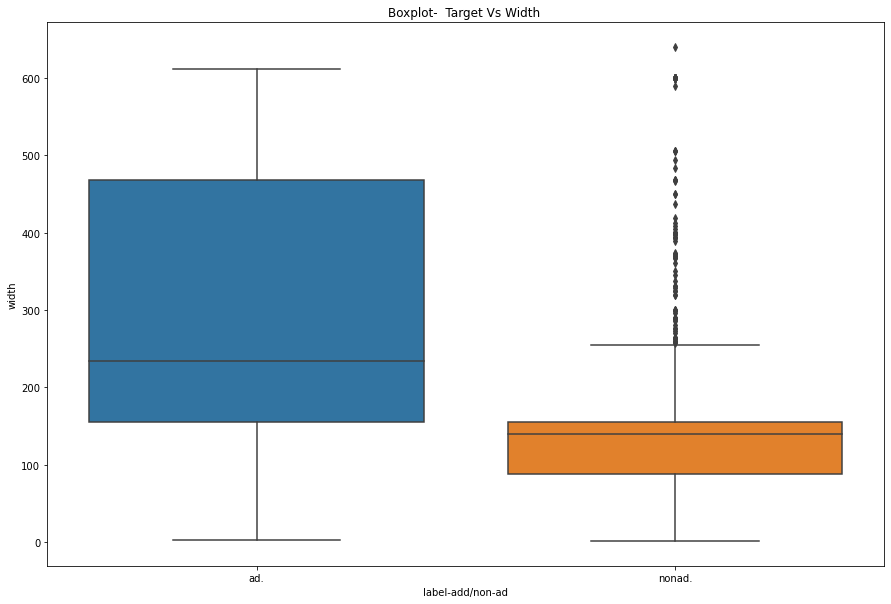

In [225]:
#Boxplot to see the difference in quartiles, mean and the outliers in the input data :
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=df)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Width ")
plt.show()

Observation from above Plot:
    
     very high number of outliers in 'non-ad' target

Feature Engineering :

Implementing Encoding :

In [226]:
#Encoding '0' - non advertisement image , '1' - advertisement image

df.iloc[:,-1]=df.iloc[:,-1].replace(['ad.','nonad.'],[1,0])

In [243]:
#Preparing Classification Model features  :
# x stores the processed features of the model
# y stores the processed labels of the model

x=df.iloc[:,:-1]
y=df.iloc[:,-1]

Normalizing or Scaling data of the input Dataset :

In [228]:
scaled=StandardScaler()
x=scaled.fit_transform(x)

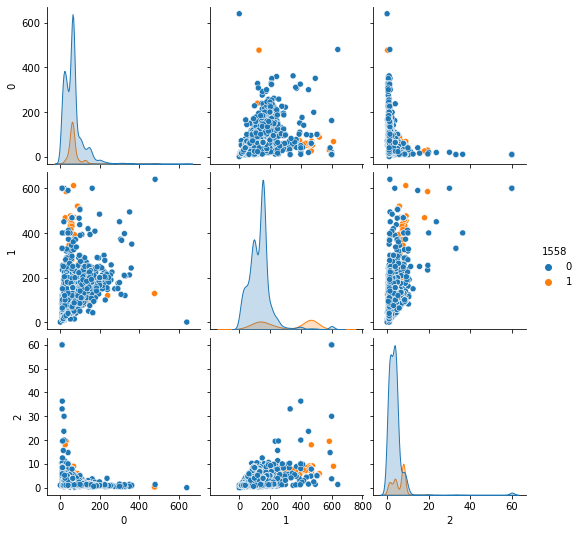

In [244]:
#To view the dataset after Normalizing it :
sns.pairplot(data=df.iloc[:,[0,1,2,-1]],hue=1558)
plt.show()

# 3) Splitting the data of the input pre-processed dataset into Train and Test Sets

In [230]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=8)

# 4) Implementation of K-Nearest Neighbours Classification on the Internet Advertisements DataSet:

In [231]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [232]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [233]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[845,   7],
       [ 43,  89]], dtype=int64)

In [234]:
# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('Accuracy Score on the Test set for K-Nearest Neighbours Classification  : ',accuracy_score(y_test,y_pred)) 

Accuracy Score on the Test set for K-Nearest Neighbours Classification  :  0.9491869918699187


In [235]:
ac_tdp ="{:.2f}".format(accuracy_score(y_test,y_pred))
print('Accuracy / Efficiency of the K-Nearest Neighbours Classifier in Classifying the Internet Advertisements Dataset correctly : ', ac_tdp)

Accuracy / Efficiency of the K-Nearest Neighbours Classifier in Classifying the Internet Advertisements Dataset correctly :  0.95


In [236]:
# Classification Report for K-Nearest Neighbours Classification :

from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       852
           1       0.93      0.67      0.78       132

    accuracy                           0.95       984
   macro avg       0.94      0.83      0.88       984
weighted avg       0.95      0.95      0.95       984



# 5) Implementation of Support Vector Machine Classification on the Internet Advertisements DataSet :

In [237]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [238]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [239]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[833,  19],
       [ 19, 113]], dtype=int64)

In [240]:
# Accuracy on the Test set results                              
from sklearn.metrics import accuracy_score
print('Accuracy Score on the Test set for Support Vector Machine Classification  : ',accuracy_score(y_test,y_pred)) 

Accuracy Score on the Test set for Support Vector Machine Classification  :  0.9613821138211383


In [241]:
ac_tdp ="{:.2f}".format(accuracy_score(y_test,y_pred))
print('Accuracy / Efficiency of the Support Vector Machine Classifier in Classifying the Internet Advertisements Dataset correctly : ', ac_tdp)

Accuracy / Efficiency of the Support Vector Machine Classifier in Classifying the Internet Advertisements Dataset correctly :  0.96


In [242]:
# Classification Report for Support Vector Machine Classification :

from sklearn.metrics import classification_report

report1 = classification_report(y_test, y_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       852
           1       0.86      0.86      0.86       132

    accuracy                           0.96       984
   macro avg       0.92      0.92      0.92       984
weighted avg       0.96      0.96      0.96       984



# 6) Compairing and Analysing the Performance Measure of Classification in terms of some Metrics for the  implementation of the two Classification Models : using the K-Nearest Neighbours (KNN) Classifier Model and the Support Vector Machine (SVM) Classifier Model on the Internet Advertisements DataSet :

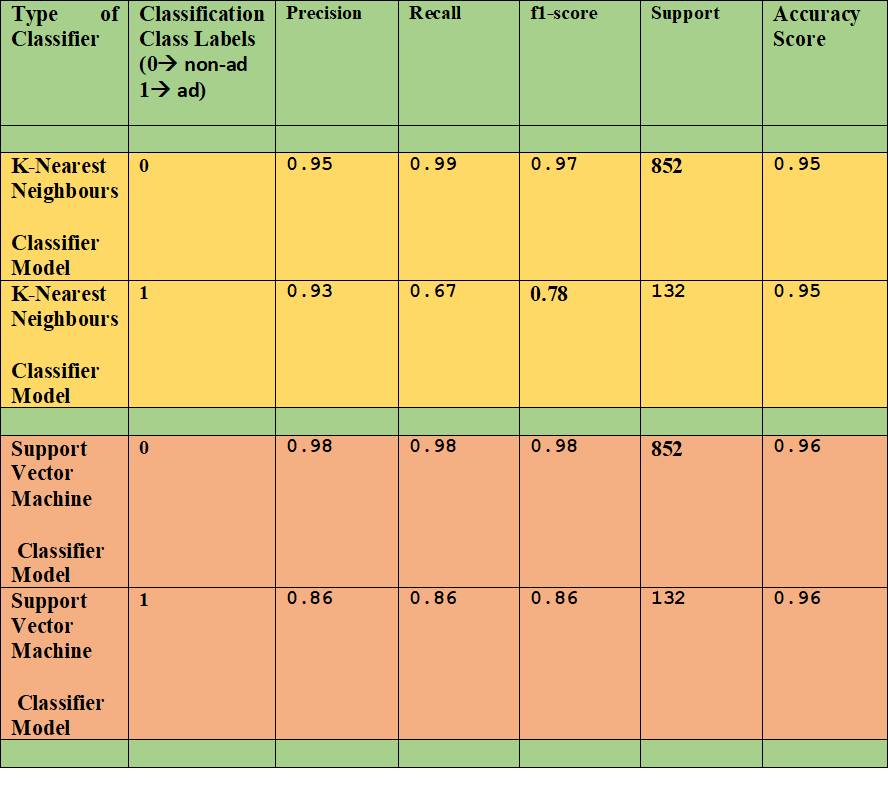

# It can be observed from the above Implementations and Analysis that:



Accuracy of the  Classifier Model implementation using K-Nearest Neighbours (KNN) Classifier : 0.9491869918699187

    Accuracy(approximately) = 0.95 

Accuracy of the  Classifier Model implementation using Support Vector Machine (SVM) Classifier : 0.9613821138211383 

    Accuracy(approximately) = 0.96

Therefore, it can be inferred that the Support Vector Machine (SVM) Classifier Model has higher Accuracy Score of 0.96(approx) that is it has

better Accuracy as compared to the K-Nearest Neighbours (KNN) Classifier Model that has Accuracy Score of 0.95(approx) that is of lesser Accuracy.

Thus, the Support Vector Machine (SVM) Classifier Model implemented for performing Classification on the Internet Advertisements DataSet to find 

out / Classify and predict the count of images that are an advertisement ---("ad") and to find out / Classify and predict the count of images that

which are not an advertisement ---("nonad") has the Highest Accuracy of 0.96(approx) out of the two Models (K-Nearest Neighbours (KNN) Classifier

Model and Support Vector Machine (SVM) Classifier Model) implemented for performing Classification on the Internet Advertisements Dataset.
